In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 45.5 MB/s eta 0:00:00


In [5]:
pip install geotiff

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.8/185.8 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 18.9 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=6cf669de8dd8c092977d50abb75362018af41090da804b0269486ed710ca6f6b
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree


In [6]:
pip install tifffile

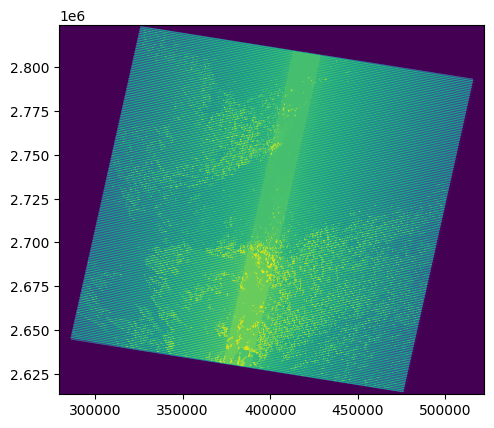

<Axes: >

In [8]:
from rasterio.plot import show
import rasterio
import geotiff
import tifffile
from PIL import Image
img = rasterio.open("/content/drive/MyDrive/LE07_L2SP_152043_20230714_20230809_02_T1_QA_PIXEL.TIF")
show(img)

In [11]:
with rasterio.open("/content/drive/MyDrive/LE07_L2SP_152043_20230714_20230809_02_T1_QA_PIXEL.TIF") as dataset:
    width = dataset.width
    height = dataset.height
    print("Image Size (Width x Height):", width, "x", height)
    num_bands = dataset.count
    print("Number of Bands:", num_bands)

Image Size (Width x Height): 8081 x 7031
Number of Bands: 1


In [12]:
dataset.count
dataset.width
dataset.height

7031

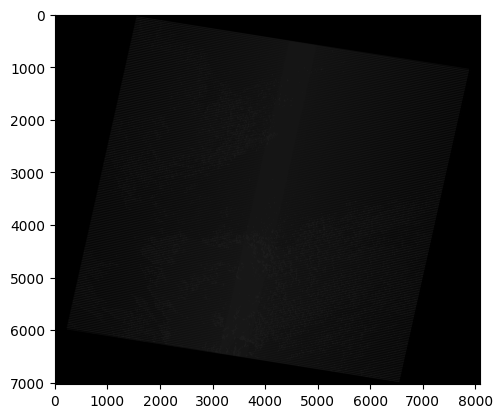

In [42]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [17]:
import numpy as np
from PIL import Image
img = Image.open("/content/drive/MyDrive/LE07_L2SP_152043_20230714_20230809_02_T1_QA_PIXEL.TIF")
img_array = np.array(img)
mean = np.mean(img_array)
std_dev = np.std(img_array)
min = np.min(img_array)
max = np.max(img_array)
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Min:", min)
print("Max:", max)

Mean: 3002.353994616202
Standard Deviation: 2911.119976991077
Min: 1
Max: 7698


In [18]:
width, height = img.size
print("Width:", width)
print("Height:", height)

Width: 8081
Height: 7031


In [29]:
from rasterio.plot import show
import geotiff
import tifffile
import matplotlib.pyplot as plt
import cv2
import numpy as np

try:
    img = cv2.imread("/content/drive/MyDrive/LE07_L2SP_152043_20230714_20230809_02_T1_QA_PIXEL.TIF")
    (height, width) = img.shape[:2]

    res = cv2.resize(img, (int(width / 2), int(height / 2)), interpolation=cv2.INTER_CUBIC)


    cv2.imwrite('result.tiff', res)

except IOError:
    print('Error while reading files !!!')



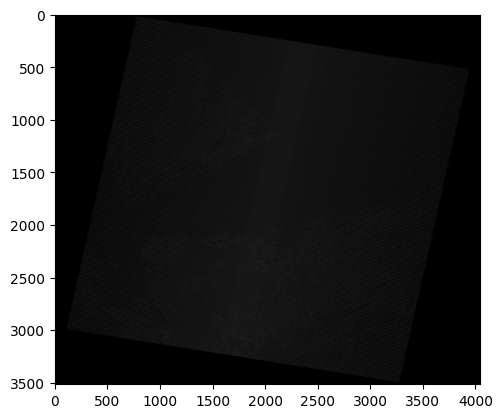

In [23]:
 plt.imshow(res)

In [32]:
try:

    img = cv2.imread("/content/drive/MyDrive/LE07_L2SP_152043_20230714_20230809_02_T1_QA_PIXEL.TIF")


    (rows, cols) = img.shape[:2]


    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
    res1 = cv2.warpAffine(img, M, (cols, rows))


    cv2.imwrite('result.tiff', res1)

except IOError:
    print('Error while reading files !!!')


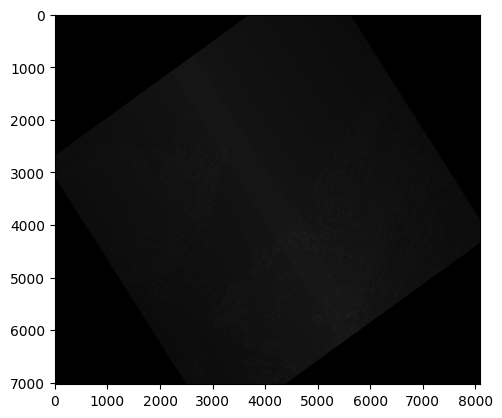

In [33]:
 plt.imshow(res1)

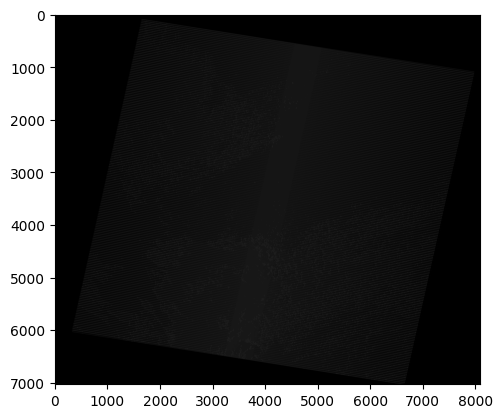

In [39]:
# Let's shift by (100, 50).
M = np.float32([[1, 0, 100], [0, 1, 50]])
try:

    img = cv2.imread("/content/drive/MyDrive/LE07_L2SP_152043_20230714_20230809_02_T1_QA_PIXEL.TIF")

    res2 = cv2.warpAffine(img, M, (cols, rows))

    cv2.imwrite('result.tiff', res2)

except IOError:
    print('Error while reading files !!!')
plt.imshow(res2)

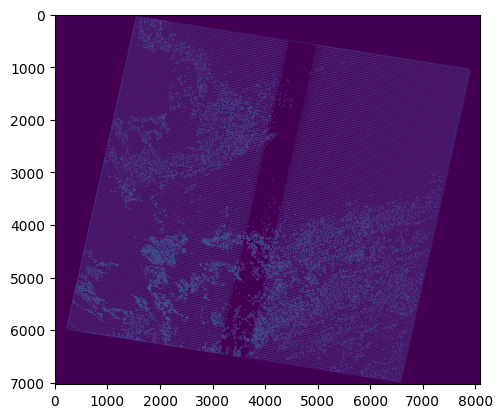

In [40]:
try:

    img = cv2.imread("/content/drive/MyDrive/LE07_L2SP_152043_20230714_20230809_02_T1_QA_PIXEL.TIF")



    edges = cv2.Canny(img, 15, 10)


    cv2.imwrite('result.tiff', edges)

except IOError:
    print('Error while reading files !!!')
plt.imshow(edges)

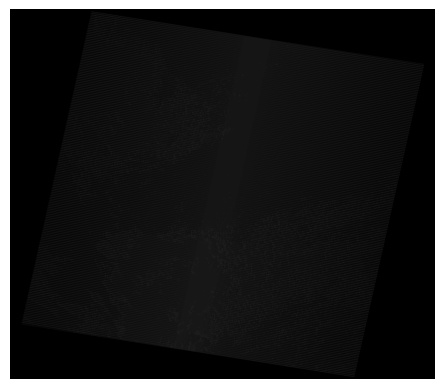

In [41]:
import cv2
import matplotlib.pyplot as plt

img2 = cv2.imread("/content/drive/MyDrive/LE07_L2SP_152043_20230714_20230809_02_T1_QA_PIXEL.TIF")

img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2_rgb)
plt.axis('off')
plt.show()